<center>
    <font size='4
    <strong> Data mining reveals spatial dynamics of global COVID-19 research </strong>
    </font>
</center>

<center>
<font size='4'><b>Modelling landslide susceptibility of Cox's Bazar district and Rohingya camps in southeastern Bangladesh through machine learning</b></font><br><br>

    
</center>

#### Import packages and data

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import data
df = pd.read_csv(os.path.join('data','landslide_data_final.csv'))

In [3]:
df.head(5)

,FID,OBJECTID_1,OBJECTID,Landslide,Aspect,Curvature,Elevation,Land use,Slope,NDVI,SPI,Distance from streamline,Soil Texture,Soil Type,Soil Permeability
0,0,1,1,1,190.490997,-0.222223,36,2,18.978201,0.263359,-0.370848,67.082001,21,4,12
1,1,2,2,1,205.710007,0.666670,43,1,20.571501,0.296057,0.409195,67.082001,21,4,12
2,2,3,3,1,236.041000,0.333335,89,1,13.854200,0.291367,-1.394830,240.000000,3,1,3
3,3,4,4,1,184.764008,-0.333335,106,1,26.688801,0.361998,-0.684769,308.868988,3,1,3
4,4,5,5,1,228.488998,1.333340,164,1,25.874399,0.292746,-0.027854,295.466003,3,1,3


#### Slice relevant columns

In [4]:
df = df[df.columns[3:]]
df

,Landslide,Aspect,Curvature,Elevation,Land use,Slope,NDVI,SPI,Distance from streamline,Soil Texture,Soil Type,Soil Permeability
0,1,190.490997,-0.222223,36,2,18.978201,0.263359,-0.370848,67.082001,21,4,12
1,1,205.710007,0.666670,43,1,20.571501,0.296057,0.409195,67.082001,21,4,12
2,1,236.041000,0.333335,89,1,13.854200,0.291367,-1.394830,240.000000,3,1,3
3,1,184.764008,-0.333335,106,1,26.688801,0.361998,-0.684769,308.868988,3,1,3
4,1,228.488998,1.333340,164,1,25.874399,0.292746,-0.027854,295.466003,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,45.000000,0.000000,1,4,0.338411,0.038033,-4.281650,42.426399,4,6,4
996,0,-1.000000,0.000000,2,4,0.000000,0.085814,-4.509770,161.554993,4,6,4
997,0,135.000000,0.000000,3,4,1.353420,0.089319,-2.094310,134.164001,4,6,4
998,0,274.398987,0.000000,4,1,3.117010,0.071850,8.091510,0.000000,13,6,8


#### Rearrange columns

In [5]:
categorical_variables = ['Land use', 'Soil Texture','Soil Type','Soil Permeability','Landslide']
non_categorical_variables = list(set(df.columns) - set(categorical_variables))

# Re-ordering columns to have non-categorical varaibles first
order = non_categorical_variables + categorical_variables
df = df[order]

#### Calculate information gain (IG)

In [6]:
features = df.columns[:-1]

# Separating out the features
X = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['Landslide']].values

In [7]:
from sklearn.feature_selection import mutual_info_classif

res = dict(zip(features,
               mutual_info_classif(X, y.ravel(), discrete_features=[-1, -2, -3, -4])
               ))

In [8]:
res = {k: v for k, v in sorted(res.items(), key=lambda item: item[1], reverse=True)}
res

{'Elevation': 0.4443383554184541,
 'Slope': 0.2953078193088321,
 'Soil Texture': 0.294505715405674,
 'Land use': 0.2530918323655476,
 'NDVI': 0.1855871073294726,
 'Soil Permeability': 0.16556070305080983,
 'SPI': 0.12081977184238712,
 'Curvature': 0.07900210883825798,
 'Soil Type': 0.0693251776350221,
 'Aspect': 0.06918938378185424,
 'Distance from streamline': 0.06214022557308252}

#### One hot encode categorical variables

In [9]:
from sklearn.preprocessing import OneHotEncoder

# Add numerical feature names to final feature name list
final_feature_names = []
final_feature_names += non_categorical_variables

# List of categorical feature names
categorical_features = ['Land use', 'Soil Texture','Soil Type','Soil Permeability']

# Copy numerical features
data = df[non_categorical_variables]

# Copy one-hot encoded categorical features
for i in categorical_features:
    encoded = OneHotEncoder(sparse=False).fit_transform(df[i].values.reshape(df.shape[0],1))
    cols = [i+'_'+str(j) for j in range (1, encoded.shape[1]+1)]
    data = pd.concat([data, pd.DataFrame(encoded, columns=cols)], axis = 1)

# Copy labels
data = pd.concat([data, df[['Landslide']]], axis = 1)


In [10]:
data

,SPI,Slope,Aspect,Distance from streamline,Curvature,NDVI,Elevation,Land use_1,Land use_2,Land use_3,...,Soil Permeability_2,Soil Permeability_3,Soil Permeability_4,Soil Permeability_5,Soil Permeability_6,Soil Permeability_7,Soil Permeability_8,Soil Permeability_9,Soil Permeability_10,Landslide
0,-0.370848,18.978201,190.490997,67.082001,-0.222223,0.263359,36,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,0.409195,20.571501,205.710007,67.082001,0.666670,0.296057,43,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,-1.394830,13.854200,236.041000,240.000000,0.333335,0.291367,89,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,-0.684769,26.688801,184.764008,308.868988,-0.333335,0.361998,106,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,-0.027854,25.874399,228.488998,295.466003,1.333340,0.292746,164,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-4.281650,0.338411,45.000000,42.426399,0.000000,0.038033,1,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
996,-4.509770,0.000000,-1.000000,161.554993,0.000000,0.085814,2,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
997,-2.094310,1.353420,135.000000,134.164001,0.000000,0.089319,3,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
998,8.091510,3.117010,274.398987,0.000000,0.000000,0.071850,4,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


#### Feature scaling

In [11]:
from sklearn.preprocessing import StandardScaler

# Stan
features = data.columns[:-1]

# Separating out the features
X = data.loc[:, features].values

# Separating out the target
y = data.loc[:,['Landslide']].values

X = StandardScaler().fit_transform(X)

In [12]:
X.shape

(1000, 45)

#### Principal Component Analysis

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=0)

principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [14]:
finalDf = pd.concat([principalDf, data[['Landslide']]], axis = 1)

In [15]:
finalDf

,principal component 1,principal component 2,Landslide
0,1.853845,-1.103348,1
1,1.546698,-0.523985,1
2,-0.154918,4.965817,1
3,-0.410166,5.443240,1
4,-0.511005,5.537653,1
...,...,...,...
995,-1.829385,-1.110328,0
996,-1.812491,-1.042706,0
997,-1.967693,-1.006506,0
998,-1.577841,-0.268241,0


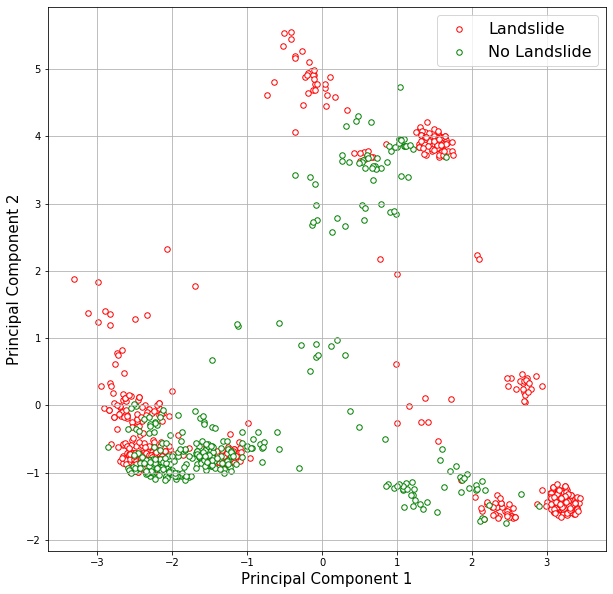

In [16]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Landslide'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c = 'white',
#                c = color,
               edgecolors = color,
               s = 30,
#                alpha = 0.25
              )
ax.legend(['Landslide','No Landslide'], fontsize =16)
ax.grid()
plt.savefig(os.path.join('figures','pca.png'), dpi = 300)

#### Splitting dataset for training and testing

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

#### Machine Learning Algorithms

In [18]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve

##### k-Nearest Neighbor
Hyperparameter(s):
* n_neighbors
* weights
* metric

Hyperparameter optimization

In [19]:
model = KNeighborsClassifier()

param_grid = { 
    'n_neighbors': [3,5,11,19],
    'weights': ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan'],
}

grid = GridSearchCV(estimator=model, param_grid=param_grid)

grid.fit(X_train, y_train.ravel())

metric = grid.best_estimator_.metric
n_neighbors = grid.best_estimator_.n_neighbors
weights = grid.best_estimator_.weights

# summarize the results of the grid search
print('Best score:', grid.best_score_)
print('Best hyperparameters:',grid.best_params_)

Best score: 0.9366666666666668
Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}


Train on optimal hyperparameters

In [20]:
knn = KNeighborsClassifier(metric=metric, n_neighbors=n_neighbors, weights=weights).fit(X_train, y_train.ravel())

Get predictions and probabilities on test set

In [21]:
knn_pred = knn.predict(X_test)
knn_proba = knn.predict_proba(X_test)

Performance metrics

In [22]:
knn_conf_mat = confusion_matrix(y_test, knn_pred)
knn_acc = accuracy_score(y_test, knn_pred)
knn_roc_auc = roc_auc_score(y_test, knn_proba[:,1])

knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_proba[:,1])
knn_precision, knn_recall, _ = precision_recall_curve(y_test, knn_proba[:,1])

knn_cls_precision, knn_cls_recall, knn_cls_f1, _ = precision_recall_fscore_support(y_test, knn_pred, average=None, labels=[0,1])

print('k Nearest Neighbors:')
print('\nConfusion matrix:\n',knn_conf_mat,'\n')
print('Accuracy:',knn_acc)
print('ROC AUC=%.4f' % (knn_roc_auc))
print('Precision on (Landslide = 0) = %.4f ' % (knn_cls_precision[0]))
print('Recall on (Landslide = 0) = %.4f ' % (knn_cls_recall[0]))
print('F1 on (Landslide = 0) = %.4f' % (knn_cls_f1[0]))
print('Precision on (Landslide = 1) = %.4f ' % (knn_cls_precision[1]))
print('Recall on (Landslide = 1) = %.4f ' % (knn_cls_recall[1]))
print('F1 on (Landslide = 1) = %.4f ' % (knn_cls_f1[1]))

k Nearest Neighbors:

Confusion matrix:
 [[114  17]
 [  6 263]] 

Accuracy: 0.9425
ROC AUC=0.9718
Precision on (Landslide = 0) = 0.9500 
Recall on (Landslide = 0) = 0.8702 
F1 on (Landslide = 0) = 0.9084
Precision on (Landslide = 1) = 0.9393 
Recall on (Landslide = 1) = 0.9777 
F1 on (Landslide = 1) = 0.9581 


##### Logistic Regression
Hyperparameter(s): 
* C (inverse of regularization strength)

In [23]:
np.logspace(-3,3,7)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

Hyperparameter optimization

In [24]:
model = LogisticRegression(random_state=0, solver = 'liblinear')

param_grid={'C':np.logspace(-3,3,7), # inverse of regularization strength
     }

grid = GridSearchCV(estimator=model, param_grid=param_grid)

grid.fit(X_train, y_train.ravel())

C = grid.best_estimator_.C

# summarize the results of the grid search
print('Best score:', grid.best_score_)
print('Best hyperparameters:',grid.best_params_)

Best score: 0.9650000000000001
Best hyperparameters: {'C': 10.0}


Train on opmtimal hyperparameters

In [25]:
lr = LogisticRegression(random_state =0, solver = 'liblinear', C=C).fit(X_train,y_train.ravel())

Get predictions and probabilities on test set

In [26]:
lr_pred = lr.predict(X_test)
lr_proba = lr.predict_proba(X_test)

Performance metrics

In [27]:
lr_conf_mat = confusion_matrix(y_test, lr_pred)
lr_acc = accuracy_score(y_test, lr_pred)
lr_roc_auc = roc_auc_score(y_test, lr_proba[:,1])

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba[:,1])
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_proba[:,1])

lr_cls_precision, lr_cls_recall, lr_cls_f1, _ = precision_recall_fscore_support(y_test, lr_pred, average=None, labels=[0,1])
print('Logistic Regression:')
print('\nConfusion matrix:\n',lr_conf_mat,'\n')
print('Accuracy:',lr_acc)
print('ROC AUC=%.4f' % (lr_roc_auc))
print('Precision on (Landslide = 0) = %.4f ' % (lr_cls_precision[0]))
print('Recall on (Landslide = 0) = %.4f ' % (lr_cls_recall[0]))
print('F1 on (Landslide = 0) = %.4f' % (lr_cls_f1[0]))
print('Precision on (Landslide = 1) = %.4f ' % (lr_cls_precision[1]))
print('Recall on (Landslide = 1) = %.4f ' % (lr_cls_recall[1]))
print('F1 on (Landslide = 1) = %.4f ' % (lr_cls_f1[1]))


Logistic Regression:

Confusion matrix:
 [[129   2]
 [  4 265]] 

Accuracy: 0.985
ROC AUC=0.9973
Precision on (Landslide = 0) = 0.9699 
Recall on (Landslide = 0) = 0.9847 
F1 on (Landslide = 0) = 0.9773
Precision on (Landslide = 1) = 0.9925 
Recall on (Landslide = 1) = 0.9851 
F1 on (Landslide = 1) = 0.9888 


##### Support Vector Machine
Hyperparameter(s): 
* C (inverse of regularization strength)
* kernel (Specifies kernel type from, ‘poly’, ‘rbf’, ‘sigmoid’)
* Gamma (kernel coefficient for 'rbf', 'poly' and 'sigmoid'

Hyperparameter optimization

In [28]:
model = SVC(random_state=0, probability=True)

param_grid={'C':np.logspace(-3,3,7),
            'kernel': ['poly', 'rbf', 'sigmoid'],
          'gamma': [0.001, 0.01, 1],
           }
grid = GridSearchCV(estimator=model, param_grid=param_grid)

grid.fit(X_train, y_train.ravel())

C = grid.best_estimator_.C
gamma = grid.best_estimator_.gamma
kernel = grid.best_estimator_.kernel

# summarize the results of the grid search
print('Best score:', grid.best_score_)
print('Best hyperparameters:',grid.best_params_)

Best score: 0.97
Best hyperparameters: {'C': 100.0, 'gamma': 0.001, 'kernel': 'rbf'}


Train on opmtimal hyperparameters

In [29]:
svm = SVC(random_state =0, probability = True, C=C,  gamma =gamma, kernel = kernel).fit(X_train,y_train.ravel())

Get predictions and probabilities on test set

In [30]:
svm_pred = svm.predict(X_test)
svm_proba = svm.predict_proba(X_test)

Performance metrics

In [31]:
svm_conf_mat = confusion_matrix(y_test, svm_pred)
svm_acc = accuracy_score(y_test, svm_pred)
svm_roc_auc = roc_auc_score(y_test, svm_proba[:,1])

svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_proba[:,1])
svm_precision, svm_recall, _ = precision_recall_curve(y_test, svm_proba[:,1])

svm_cls_precision, svm_cls_recall, svm_cls_f1, _ = precision_recall_fscore_support(y_test, svm_pred, average=None, labels=[0,1])
print('Support Vector Machine :')
print('\nConfusion matrix:\n',svm_conf_mat,'\n')
print('Accuracy:',svm_acc)
print('ROC AUC=%.4f' % (svm_roc_auc))
print('Precision on (Landslide = 0) = %.4f ' % (svm_cls_precision[0]))
print('Recall on (Landslide = 0) = %.4f ' % (svm_cls_recall[0]))
print('F1 on (Landslide = 0) = %.4f' % (svm_cls_f1[0]))
print('Precision on (Landslide = 1) = %.4f ' % (svm_cls_precision[1]))
print('Recall on (Landslide = 1) = %.4f ' % (svm_cls_recall[1]))
print('F1 on (Landslide = 1) = %.4f ' % (svm_cls_f1[1]))

Support Vector Machine :

Confusion matrix:
 [[126   5]
 [  3 266]] 

Accuracy: 0.98
ROC AUC=0.9991
Precision on (Landslide = 0) = 0.9767 
Recall on (Landslide = 0) = 0.9618 
F1 on (Landslide = 0) = 0.9692
Precision on (Landslide = 1) = 0.9815 
Recall on (Landslide = 1) = 0.9888 
F1 on (Landslide = 1) = 0.9852 


##### Multi Layer Perceptron (Artificial Neural Network
Hyperparameter(s):
* hidden_layer_sizes
* activation (activation function for squeezing output)
* alpha
* learning rate

Hyperparameter optimization

In [32]:
10.0 ** -np.arange(1, 5)

array([0.1   , 0.01  , 0.001 , 0.0001])

In [33]:
np.arange(10, 50, 5)

array([10, 15, 20, 25, 30, 35, 40, 45])

In [34]:
model = MLPClassifier(random_state=0, max_iter=1000)

param_grid={
            'hidden_layer_sizes': np.arange(10, 50,5),
            'activation': ['identity', 'logistic', 'tanh', 'relu'],
            'alpha' : 10.0 ** -np.arange(1, 5),
            'learning_rate': ['constant', 'adaptive']
           }

grid = GridSearchCV(estimator=model, param_grid=param_grid)

grid.fit(X_train, y_train.ravel())

hidden_layer_sizes = grid.best_estimator_.hidden_layer_sizes
activation = grid.best_estimator_.activation
alpha = grid.best_estimator_.alpha
learning_rate = grid.best_estimator_.learning_rate

# summarize the results of the grid search
print('Best score:', grid.best_score_)
print('Best hyperparameters:',grid.best_params_)

Best score: 0.9666666666666666
Best hyperparameters: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': 20, 'learning_rate': 'constant'}


Train on optimal hyperparameters

In [35]:
mlp = MLPClassifier(random_state=0, max_iter = 1000, activation = activation, alpha = alpha, hidden_layer_sizes = hidden_layer_sizes, learning_rate=learning_rate).fit(X_train, y_train.ravel())

Get predictions and probabilities on test set

In [36]:
mlp_pred = mlp.predict(X_test)
mlp_proba = mlp.predict_proba(X_test)

Performance metrics

In [37]:
mlp_conf_mat = confusion_matrix(y_test, mlp_pred)
mlp_acc = accuracy_score(y_test, mlp_pred)
mlp_roc_auc = roc_auc_score(y_test, mlp_proba[:,1])

mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_proba[:,1])
mlp_precision, mlp_recall, _ = precision_recall_curve(y_test, mlp_proba[:,1])

mlp_cls_precision, mlp_cls_recall, mlp_cls_f1, _ = precision_recall_fscore_support(y_test, mlp_pred, average=None, labels=[0,1])

print('Multi Layer Perceptron :')
print('\nConfusion matrix:\n',mlp_conf_mat,'\n')
print('Accuracy:',mlp_acc)
print('ROC AUC=%.4f' % (mlp_roc_auc))
print('Precision on (Landslide = 0) = %.4f ' % (mlp_cls_precision[0]))
print('Recall on (Landslide = 0) = %.4f ' % (mlp_cls_recall[0]))
print('F1 on (Landslide = 0) = %.4f' % (mlp_cls_f1[0]))
print('Precision on (Landslide = 1) = %.4f ' % (mlp_cls_precision[1]))
print('Recall on (Landslide = 1) = %.4f ' % (mlp_cls_recall[1]))
print('F1 on (Landslide = 1) = %.4f ' % (mlp_cls_f1[1]))

Multi Layer Perceptron :

Confusion matrix:
 [[126   5]
 [  3 266]] 

Accuracy: 0.98
ROC AUC=0.9966
Precision on (Landslide = 0) = 0.9767 
Recall on (Landslide = 0) = 0.9618 
F1 on (Landslide = 0) = 0.9692
Precision on (Landslide = 1) = 0.9815 
Recall on (Landslide = 1) = 0.9888 
F1 on (Landslide = 1) = 0.9852 


##### Decision Tree
* max_features
* max_depth
* criterion

Hyperparameter optimization

In [38]:
np.arange(10,30,2)

array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28])

In [39]:
model = DecisionTreeClassifier(random_state=0)

param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : np.arange(10,40,5),
    'criterion' :['gini', 'entropy']
}

grid = GridSearchCV(estimator=model, param_grid=param_grid)

grid.fit(X_train, y_train.ravel())

criterion = grid.best_estimator_.criterion
max_depth = grid.best_estimator_.max_depth
max_features = grid.best_estimator_.max_features

# summarize the results of the grid search
print('Best score:', grid.best_score_)
print('Best hyperparameters:',grid.best_params_)

Best score: 0.9483333333333333
Best hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto'}


Train on optimal hyperparameters

In [40]:
dt = DecisionTreeClassifier(random_state=0, criterion = criterion, max_depth=max_depth, max_features=max_features).fit(X_train, y_train.ravel())

Get predictions and probabilities on test set

In [41]:
dt_pred = dt.predict(X_test)
dt_proba = dt.predict_proba(X_test)

Performance metrics

In [42]:
dt_conf_mat = confusion_matrix(y_test, dt_pred)
dt_acc = accuracy_score(y_test, dt_pred)
dt_roc_auc = roc_auc_score(y_test, dt_proba[:,1])

dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_proba[:,1])
dt_precision, dt_recall, _ = precision_recall_curve(y_test, dt_proba[:,1])

dt_cls_precision, dt_cls_recall, dt_cls_f1, _ = precision_recall_fscore_support(y_test, dt_pred, average=None, labels=[0,1])

print('Decision Tree:')
print('\nConfusion matrix:\n',dt_conf_mat,'\n')
print('Accuracy:',dt_acc)
print('ROC AUC=%.4f' % (dt_roc_auc))
print('Precision on (Landslide = 0) = %.4f ' % (dt_cls_precision[0]))
print('Recall on (Landslide = 0) = %.4f ' % (dt_cls_recall[0]))
print('F1 on (Landslide = 0) = %.4f' % (dt_cls_f1[0]))
print('Precision on (Landslide = 1) = %.4f ' % (dt_cls_precision[1]))
print('Recall on (Landslide = 1) = %.4f ' % (dt_cls_recall[1]))
print('F1 on (Landslide = 1) = %.4f ' % (dt_cls_f1[1]))

Decision Tree:

Confusion matrix:
 [[121  10]
 [  9 260]] 

Accuracy: 0.9525
ROC AUC=0.9450
Precision on (Landslide = 0) = 0.9308 
Recall on (Landslide = 0) = 0.9237 
F1 on (Landslide = 0) = 0.9272
Precision on (Landslide = 1) = 0.9630 
Recall on (Landslide = 1) = 0.9665 
F1 on (Landslide = 1) = 0.9647 


##### Random Forest

Hyperparameter(s):
* n_estimators
* max_features
* max_depth
* criterion

Hyperparameter optimization

In [43]:
model = RandomForestClassifier(random_state=0)

param_grid = { 
    'n_estimators': [200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : np.arange(10,30,2),
    'criterion' :['gini', 'entropy']
}

grid = GridSearchCV(estimator=model, param_grid=param_grid)

grid.fit(X_train, y_train.ravel())

n_estimators = grid.best_estimator_.n_estimators
criterion = grid.best_estimator_.criterion
max_depth = grid.best_estimator_.max_depth
max_features = grid.best_estimator_.max_features

# summarize the results of the grid search
print('Best score:', grid.best_score_)
print('Best hyperparameters:',grid.best_params_)

Best score: 0.9816666666666667
Best hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 300}


Train on optimal hyperparameters

In [44]:
rf = RandomForestClassifier(random_state=0, criterion=criterion, max_depth=max_depth, max_features=max_features, n_estimators = n_estimators).fit(X_train, y_train.ravel())

Get predictions and probabilities on test set

In [45]:
rf_pred = rf.predict(X_test)
rf_proba = rf.predict_proba(X_test)

Performance metrics

In [46]:
rf_conf_mat = confusion_matrix(y_test, rf_pred)
rf_acc = accuracy_score(y_test, rf_pred)
rf_roc_auc = roc_auc_score(y_test, rf_proba[:,1])

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba[:,1])
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_proba[:,1])

rf_cls_precision, rf_cls_recall, rf_cls_f1, _ = precision_recall_fscore_support(y_test, rf_pred, average=None, labels=[0,1])

print('Random Forest :')
print('\nConfusion matrix:\n',rf_conf_mat,'\n')
print('Accuracy:',rf_acc)
print('ROC AUC=%.4f' % (rf_roc_auc))
print('Precision on (Landslide = 0) = %.4f ' % (rf_cls_precision[0]))
print('Recall on (Landslide = 0) = %.4f ' % (rf_cls_recall[0]))
print('F1 on (Landslide = 0) = %.4f' % (rf_cls_f1[0]))
print('Precision on (Landslide = 1) = %.4f ' % (rf_cls_precision[1]))
print('Recall on (Landslide = 1) = %.4f ' % (rf_cls_recall[1]))
print('F1 on (Landslide = 1) = %.4f ' % (rf_cls_f1[1]))

Random Forest :

Confusion matrix:
 [[127   4]
 [  3 266]] 

Accuracy: 0.9825
ROC AUC=0.9989
Precision on (Landslide = 0) = 0.9769 
Recall on (Landslide = 0) = 0.9695 
F1 on (Landslide = 0) = 0.9732
Precision on (Landslide = 1) = 0.9852 
Recall on (Landslide = 1) = 0.9888 
F1 on (Landslide = 1) = 0.9870 


#### Export trained and tested models

In [52]:
import joblib

joblib.dump(knn, os.path.join('models','knn.pkl'), compress=9)
joblib.dump(lr, os.path.join('models','lr.pkl'), compress=9)
joblib.dump(svm, os.path.join('models','svm.pkl'), compress=9)
joblib.dump(mlp, os.path.join('models','mlp.pkl'), compress=9)
joblib.dump(dt, os.path.join('models','dt.pkl'), compress=9)
joblib.dump(rf, os.path.join('models','rf.pkl'), compress=9)

['models/rf.pkl']

#### Export performance metrics of models

In [53]:
perf_metr = pd.DataFrame(index = ['K Nearest Neighbors',
                        'Logistic Regression',
                        'Support Vector Machine',
                        'Multi Layer Perceptron',
                        'Decision Tree',
                        'Random Forest',
                       ],
             columns = ['Accuracy', 
                        'ROC AUC', 
                        'Precision on Landlside=0', 
                        'Recall on Landlside=0', 
                        'F1-score on Landlside=0', 
                        'Precision on Landlside=1', 
                        'Recall on Landlside=1', 
                        'F1-score on Landlside=1']
            )

In [54]:
knn_perf_metr = pd.Series([knn_acc, knn_roc_auc, knn_cls_precision[0], knn_cls_recall[0], knn_cls_f1[0], knn_cls_precision[0],knn_cls_recall[0], knn_cls_f1[0]])
lr_perf_metr = pd.Series([lr_acc, lr_roc_auc, lr_cls_precision[0], lr_cls_recall[0], lr_cls_f1[0], lr_cls_precision[0],lr_cls_recall[0], lr_cls_f1[0]])
svm_perf_metr = pd.Series([svm_acc, svm_roc_auc, svm_cls_precision[0], svm_cls_recall[0], svm_cls_f1[0], svm_cls_precision[0],svm_cls_recall[0], svm_cls_f1[0]])
mlp_perf_metr = pd.Series([mlp_acc, mlp_roc_auc, mlp_cls_precision[0], mlp_cls_recall[0], mlp_cls_f1[0], mlp_cls_precision[0],mlp_cls_recall[0], mlp_cls_f1[0]])
dt_perf_metr = pd.Series([dt_acc, dt_roc_auc, dt_cls_precision[0], dt_cls_recall[0], dt_cls_f1[0], dt_cls_precision[0],dt_cls_recall[0], dt_cls_f1[0]])
rf_perf_metr = pd.Series([rf_acc, rf_roc_auc, rf_cls_precision[0], rf_cls_recall[0], rf_cls_f1[0], rf_cls_precision[0],rf_cls_recall[0], rf_cls_f1[0]])

In [55]:
perf_metr.loc['K Nearest Neighbors',:] = knn_perf_metr.values
perf_metr.loc['Logistic Regression',:] = lr_perf_metr.values
perf_metr.loc[ 'Support Vector Machine',:] = svm_perf_metr.values
perf_metr.loc['Multi Layer Perceptron',:] = mlp_perf_metr.values
perf_metr.loc['Decision Tree',:] = dt_perf_metr.values
perf_metr.loc['Random Forest',:] = rf_perf_metr.values

In [56]:
perf_metr = perf_metr.astype(float).round(4)

In [57]:
perf_metr

,Accuracy,ROC AUC,Precision on Landlside=0,Recall on Landlside=0,F1-score on Landlside=0,Precision on Landlside=1,Recall on Landlside=1,F1-score on Landlside=1
K Nearest Neighbors,0.9425,0.9718,0.9500,0.8702,0.9084,0.9500,0.8702,0.9084
Logistic Regression,0.9850,0.9973,0.9699,0.9847,0.9773,0.9699,0.9847,0.9773
Support Vector Machine,0.9800,0.9991,0.9767,0.9618,0.9692,0.9767,0.9618,0.9692
Multi Layer Perceptron,0.9800,0.9966,0.9767,0.9618,0.9692,0.9767,0.9618,0.9692
Decision Tree,0.9525,0.9450,0.9308,0.9237,0.9272,0.9308,0.9237,0.9272
Random Forest,0.9825,0.9989,0.9769,0.9695,0.9732,0.9769,0.9695,0.9732


In [58]:
perf_metr.to_csv(os.path.join('data','performance_metrics.csv'))

#### ROC-AUC curves

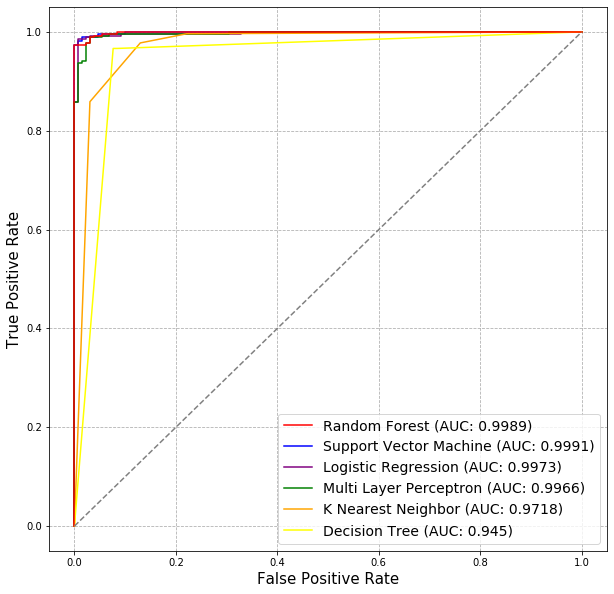

In [59]:
# calculate roc curves

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba[:,1])
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_proba[:,1])
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_proba[:,1])
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba[:,1])

fig, ax = plt.subplots(1, figsize=(10,10))

# fig.figure(figsize=(10,10))

# plot the roc curve for the model
# pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
ax.plot(svm_fpr, svm_tpr,  color = 'blue', label='Support Vector Machine (AUC: ' + str(np.round(svm_roc_auc,4))+')')
ax.plot(lr_fpr, lr_tpr,  color = 'purple', label='Logistic Regression (AUC: ' + str(np.round(lr_roc_auc,4))+')')
ax.plot(mlp_fpr, mlp_tpr, color = 'green', label='Multi Layer Perceptron (AUC: ' + str(np.round(mlp_roc_auc,4))+')')
ax.plot(knn_fpr, knn_tpr,  color = 'orange',label='K Nearest Neighbor (AUC: ' + str(np.round(knn_roc_auc,4))+')')
ax.plot(dt_fpr, dt_tpr,  color = 'yellow', label='Decision Tree (AUC: ' + str(np.round(dt_roc_auc,4))+')')
ax.plot(rf_fpr, rf_tpr,  color = 'red', label='Random Forest (AUC: ' + str(np.round(rf_roc_auc,4))+')')
ax.plot([0,1],[0,1], color='grey', linestyle='dashed')

# axis labels
ax.set_xlabel('False Positive Rate', fontsize=15)
ax.set_ylabel('True Positive Rate', fontsize=15)

# show the legend
# plt.legend()

handles,labels = ax.get_legend_handles_labels()


handles = [handles[5], handles[0], handles[1], handles[2], handles[3], handles[4]]
labels = [labels[5], labels[0], labels[1], labels[2], labels[3], labels[4]]

ax.grid(linestyle='dashed')
ax.legend(handles,labels, fontsize=14)

plt.savefig(os.path.join('figures','roc-auc.png'), dpi = 300)
# show the plot
plt.show()


#### Decision Tree for visualization
(Graphviz needs to be installed for visualizing decision trees)

In [60]:
# Stan
features = data.columns[:-1]

# Separating out the features
X = data.loc[:, features].values

# Separating out the target
y = data.loc[:,['Landslide']].values


In [61]:
X

array([[ -0.370848 ,  18.9782009, 190.4909973, ...,   0.       ,
          0.       ,   1.       ],
       [  0.409195 ,  20.5715008, 205.7100067, ...,   0.       ,
          0.       ,   1.       ],
       [ -1.39483  ,  13.8542004, 236.0410004, ...,   0.       ,
          0.       ,   0.       ],
       ...,
       [ -2.09431  ,   1.35342  , 135.       , ...,   0.       ,
          0.       ,   0.       ],
       [  8.0915098,   3.1170101, 274.3989868, ...,   0.       ,
          0.       ,   0.       ],
       [-11.1616001,   0.756771 , 198.4349976, ...,   0.       ,
          0.       ,   0.       ]])

In [62]:
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

Hyperparameter optimization

In [64]:
np.arange(10,30,2)

array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28])

In [65]:
model = DecisionTreeClassifier(random_state=0)

param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : np.arange(1,50),
    'criterion' :['gini', 'entropy']
}

grid = GridSearchCV(estimator=model, param_grid=param_grid)

grid.fit(X_train, y_train.ravel())

criterion = grid.best_estimator_.criterion
max_depth = grid.best_estimator_.max_depth
max_features = grid.best_estimator_.max_features

# summarize the results of the grid search
print('Best score:', grid.best_score_)
print('Best hyperparameters:',grid.best_params_)

Best score: 0.9483333333333333
Best hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto'}


Train on optimal hyperparameters

In [66]:
dt_viz = DecisionTreeClassifier(random_state=0, criterion = criterion, max_depth=max_depth, max_features=max_features).fit(X_train, y_train.ravel())

Get predictions and probabilities on test set

In [67]:
dt_viz_pred = dt_viz.predict(X_test)
dt_viz_proba = dt_viz.predict_proba(X_test)

Performance metrics

In [68]:
dt_viz_conf_mat = confusion_matrix(y_test, dt_viz_pred)
dt_viz_acc = accuracy_score(y_test, dt_viz_pred)
dt_viz_roc_auc = roc_auc_score(y_test, dt_viz_proba[:,1])

dt_viz_fpr, dt_viz_tpr, _ = roc_curve(y_test, dt_viz_proba[:,1])
dt_viz_precision, dt_viz_recall, _ = precision_recall_curve(y_test, dt_viz_proba[:,1])

dt_viz_cls_precision, dt_viz_cls_recall, dt_viz_cls_f1, _ = precision_recall_fscore_support(y_test, dt_viz_pred, average=None, labels=[0,1])

print('Decision Tree for Visualization:')
print('\nConfusion matrix:\n',dt_viz_conf_mat,'\n')
print('Accuracy:',dt_viz_acc)
print('ROC AUC=%.4f' % (dt_viz_roc_auc))
print('Precision on (Landslide = 0) = %.4f ' % (dt_viz_cls_precision[0]))
print('Recall on (Landslide = 0) = %.4f ' % (dt_viz_cls_recall[0]))
print('F1 on (Landslide = 0) = %.4f' % (dt_viz_cls_f1[0]))
print('Precision on (Landslide = 1) = %.4f ' % (dt_viz_cls_precision[1]))
print('Recall on (Landslide = 1) = %.4f ' % (dt_viz_cls_recall[1]))
print('F1 on (Landslide = 1) = %.4f ' % (dt_viz_cls_f1[1]))

Decision Tree for Visualization:

Confusion matrix:
 [[121  10]
 [  9 260]] 

Accuracy: 0.9525
ROC AUC=0.9450
Precision on (Landslide = 0) = 0.9308 
Recall on (Landslide = 0) = 0.9237 
F1 on (Landslide = 0) = 0.9272
Precision on (Landslide = 1) = 0.9630 
Recall on (Landslide = 1) = 0.9665 
F1 on (Landslide = 1) = 0.9647 


In [69]:
from sklearn.tree import export_graphviz

export_graphviz(dt_viz, out_file=os.path.join('models','tree_viz.dot'), 
                feature_names = features,
#                 class_names = ['Landslide',]iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)



In [70]:
# Convert to png using system command (requires Graphviz) 
#  if graphviz not install use tree.dot file to generate png or comment out the remaining code
from subprocess import call
call(['dot', '-Tpng', 'models/tree_viz.dot', '-o', 'figures/tree_viz.png', '-Gdpi=300'])

0